#1. Preprocessing

In [2]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import seaborn                         as      sns
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams


In [3]:
# clean it dat further processing.
import pandas as pd

dfr = pd.read_csv('/content/Rose (1).csv',parse_dates=True,index_col='YearMonth')
dfr.head().to_csv('rose_head.csv')
dfr.head()




,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [4]:
dfr.isna().sum()

,0
Rose,2


In [5]:
dfr = dfr.interpolate()

In [6]:
dfr.isna().sum()

,0
Rose,0


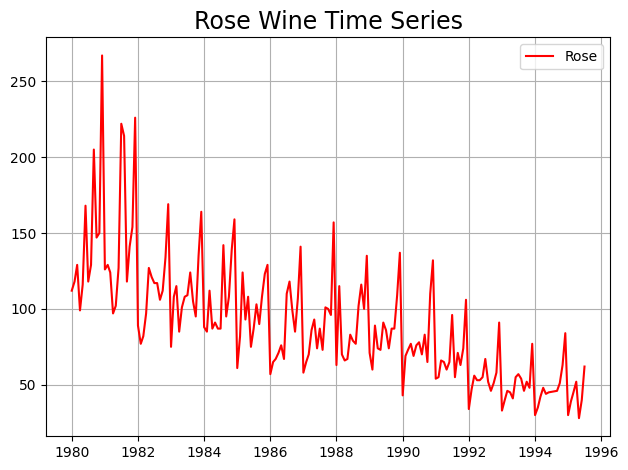

In [7]:
# ROSE TIME SERIES

plt.plot(dfr, color='red');
plt.title('Rose Wine Time Series', fontsize=17);
plt.grid();
plt.legend(['Rose'], loc='best');
plt.tight_layout()
plt.savefig('rose_ts.jpg', bbox_inches='tight');

In [8]:
round(dfr.describe().T,3).to_csv('rose_describe.csv')
round(dfr.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
Rose,187.0,89.914,39.238,28.0,62.5,85.0,111.0,267.0


In [9]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

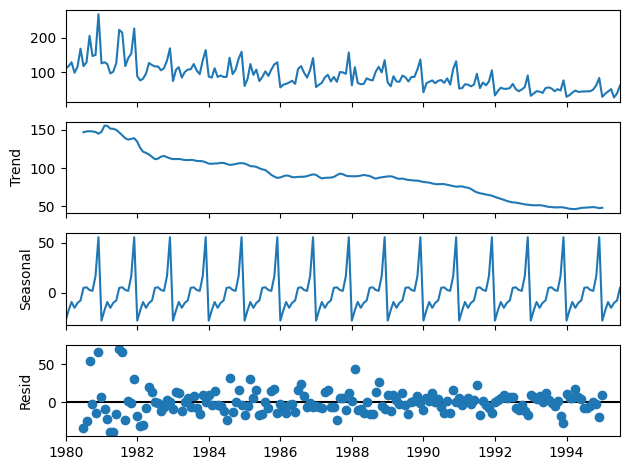

In [10]:
decompositionr = seasonal_decompose(dfr,model='additive')

decompositionr.plot()
plt.savefig('decomposer.jpg', bbox_inches='tight');

In [11]:
# ROSE DATA SPLIT

rtrain = dfr[dfr.index<'1991']
rtest = dfr[dfr.index>='1991']

In [12]:
print(rtrain.shape)


(132, 1)


In [13]:
# ROSE DATA TRAIN AND TEST

print('First few rows of Rose Training Data')
display(rtrain.head())
print('Last few rows of Rose Training Data')
display(rtrain.tail())
print('First few rows of Rose Test Data')
display(rtest.head())
print('Last few rows of Rose Test Data')
display(rtest.tail())

rtrain.to_csv('rose_train.csv')
rtest.to_csv('rose_test.csv')

First few rows of Rose Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Rose Training Data


,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Rose Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Rose Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


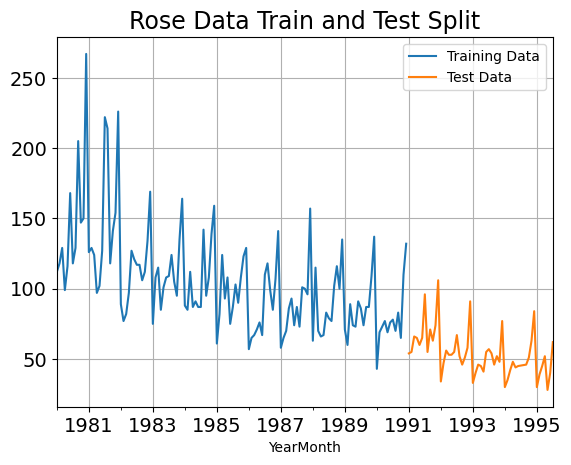

In [14]:
# ROSE DATA TRAIN TEST SPLIT TIME SERIES

rtrain['Rose'].plot(fontsize=14)
rtest['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Rose Data Train and Test Split', fontsize=17)
plt.savefig('rose_split_ts.jpg', bbox_inches='tight')
plt.show();

#2. TS FORECASTING *TECHNIQUES*

##1. Moving Averages


In [15]:
from sklearn import metrics


In [16]:
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()

In [17]:
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


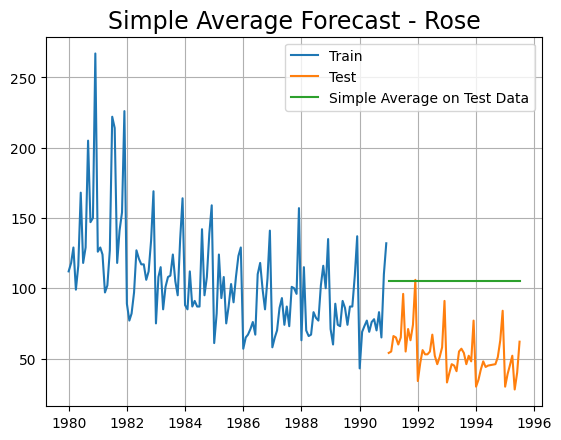

In [18]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('rose_simpleaverage.jpg', bbox_inches='tight');

In [19]:
MovingAverage = dfr.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [20]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


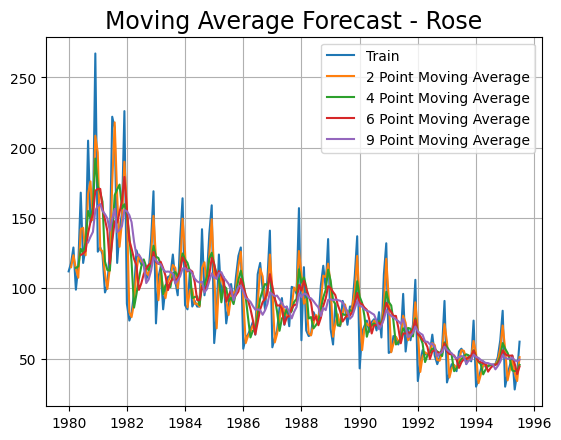

In [21]:
# Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17)
plt.savefig('rose_ma.jpg', bbox_inches='tight');

In [24]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

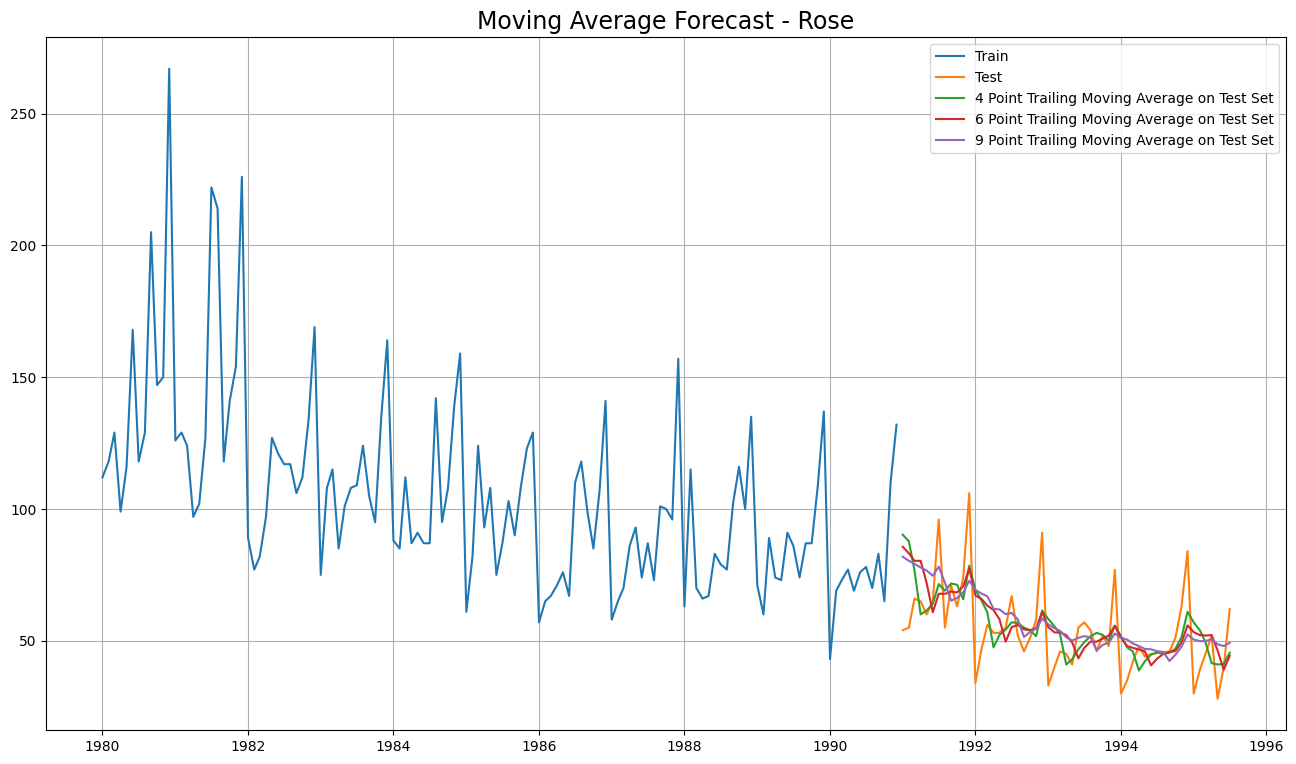

In [25]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17);
plt.savefig('rose_ma_test.jpg', bbox_inches='tight');

In [26]:


rmse_model4_test_4 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.728


##2. Holt WInter Exponential Smothing



In [ ]:
import statsmodels.tools.eval_measures as      em
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
# create class
model_SES = SimpleExpSmoothing(rtrain,initialization_method='estimated' )

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_SES_autofit = model_SES.fit(optimized=True)


In [ ]:
model_SES_autofit.params


{'smoothing_level': 0.09874920899865502,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3871074301239,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
SES_predict_rose = model_SES_autofit.forecast(steps=len(rtest))
SES_predict_rose

,0
1991-01-01,87.10498
1991-02-01,87.10498
1991-03-01,87.10498
1991-04-01,87.10498
1991-05-01,87.10498
1991-06-01,87.10498
1991-07-01,87.10498
1991-08-01,87.10498
1991-09-01,87.10498
1991-10-01,87.10498


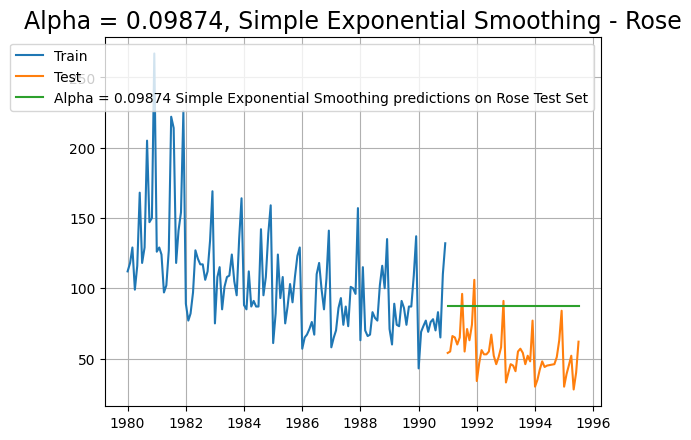

In [ ]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09874, Simple Exponential Smoothing - Rose', fontsize=17);
plt.savefig('rose_ses.jpg', bbox_inches='tight');

In [ ]:
print('SES RMSE:',mean_squared_error(rtest.values,SES_predict_rose.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_rose.values)[0])

SES RMSE: 36.79622482462249
SES RMSE (calculated using statsmodels): 36.796224824622485


In [ ]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100


In [ ]:
print('SES RMSE:',mean_squared_error(rtest.values,SES_predict_rose.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_rose.values)[0])

SES RMSE: 36.79622482462249
SES RMSE (calculated using statsmodels): 36.796224824622485


In [ ]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(rtrain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 5.448169774560283e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81762949544608, 'initial_trend': -0.4943507283995123, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Forecasting using this model for the duration of the test set
DES_predict_rose =  model_DES.forecast(len(rtest))
DES_predict_rose

,0
1991-01-01,72.068983
1991-02-01,71.574632
1991-03-01,71.080281
1991-04-01,70.585930
1991-05-01,70.091580
1991-06-01,69.597229
1991-07-01,69.102878
1991-08-01,68.608528
1991-09-01,68.114177
1991-10-01,67.619826


In [ ]:
print('DES RMSE:',mean_squared_error(rtest.values,DES_predict_rose.values,squared=False))


DES RMSE: 15.27096843395306


In [ ]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07736040004765096, 'smoothing_trend': 0.03936496779735522, 'smoothing_seasonal': 0.0008375039104357999, 'damping_trend': nan, 'initial_level': 156.90674503596637, 'initial_trend': -0.9061396720042346, 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
       0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
       1.19783562, 1.6514144 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
# Forecasting using this model for the duration of the test set
TES_predict_am_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_rose

,0
1991-01-01,55.942246
1991-02-01,63.240624
1991-03-01,68.899674
1991-04-01,60.007486
1991-05-01,67.257150
1991-06-01,72.880875
1991-07-01,79.913317
1991-08-01,84.831135
1991-09-01,79.856761
1991-10-01,78.009465


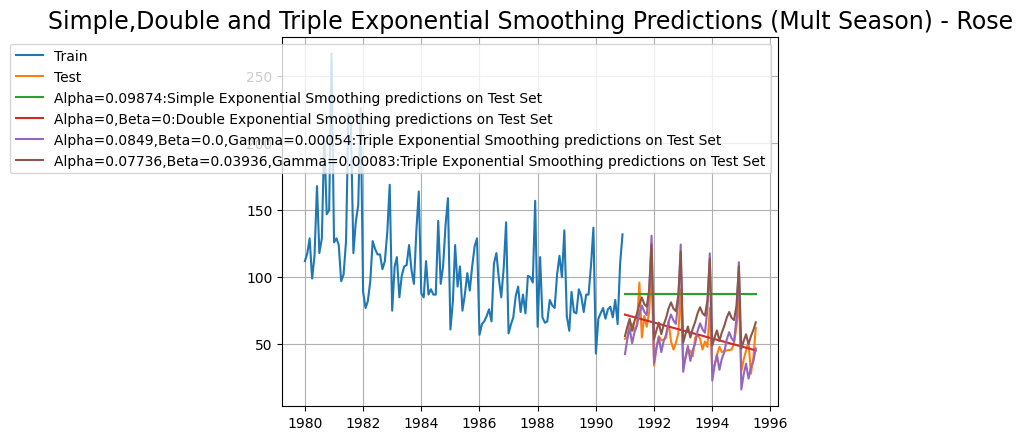

In [ ]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Rose', fontsize=17);

plt.savefig('rose_mul_tes.jpg', bbox_inches='tight');

##3. Stationarity Tests

In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
dfrs = adfuller(dfr,regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -2.240
DF test p-value is 0.46713716277931305
Number of lags used 13


In [ ]:
dfrs = adfuller(dfr.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -8.162
DF test p-value is 3.0159761158274826e-11
Number of lags used 12


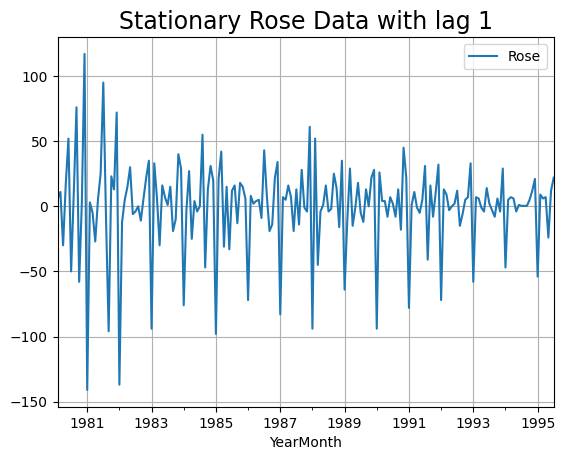

In [ ]:
dfr.diff().dropna().plot(grid=True);
plt.title('Stationary Rose Data with lag 1', fontsize=17);
plt.savefig('rose_stationary.jpg', bbox_inches='tight');

##4. ARIMA

In [ ]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## As seen before, Stationarity is achived with a difference of 1.
## We have kept the value of d as 1

import itertools

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

print('Examples of the parameter combinations for the Model')

for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [ ]:
# Creating an empty Dataframe with column names only
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC

,param,AIC


In [ ]:
import pandas as pd

# Assuming ROSE_ARIMA_AIC is a DataFrame created earlier to store AIC values and model parameters
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

for param in [(0, 1, 0)]:  # Replace with your grid of parameters
    ARIMA_model = ARIMA(dfr['Rose'], order=param).fit()  # Fit the ARIMA model
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))  # Print the parameters and AIC

    # Append the AIC values and model parameters to the DataFrame using pd.concat
    new_row = pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})
    ROSE_ARIMA_AIC = pd.concat([ROSE_ARIMA_AIC, new_row], ignore_index=True)

# Display the final DataFrame
print(ROSE_ARIMA_AIC)


ARIMA(0, 1, 0) - AIC:1852.3899820257639
       param          AIC
0  (0, 1, 0)  1852.389982


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-133-9fb0d70b2229>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ROSE_ARIMA_AIC = pd.concat([ROSE_ARIMA_AIC, new_row], igno

In [ ]:

## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ROSE_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
0,"(0, 1, 0)",1852.389982


In [ ]:
auto_ARIMA = ARIMA(rtrain, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 08 Sep 2024   AIC                           1274.695
Time:                        19:33:45   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.034      0.000      -1.842      -1.514
ar.L2         -0.7288      0.084     -8.702      0.000      -0.893      -0.565
ma.L1          1.0447      0.644      1.622      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predicted_manual_ARIMA = results_auto_ARIMA.forecast(steps=len(rtest))
predicted_manual_ARIMA

,predicted_mean
1991-01-01,85.615374
1991-02-01,90.529872
1991-03-01,81.971586
1991-04-01,92.750114
1991-05-01,80.901745
1991-06-01,92.927133
1991-07-01,81.384412
1991-08-01,91.988245
1991-09-01,82.608034
1991-10-01,90.619351


In [ ]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 36.815186018493684


##5. SARIMA

In [ ]:

import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -379.498
Date:                            Sun, 08 Sep 2024   AIC                            776.996
Time:                                    19:36:05   BIC                            799.692
Sample:                                01-01-1980   HQIC                           786.156
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8551      0.146     -5.838      0.000      -1.142      -0.568
ar.L2         -0.0022      0.125   

In [ ]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -334.893
Date:                            Sun, 08 Sep 2024   AIC                            689.786
Time:                                    19:36:24   BIC                            713.730
Sample:                                01-01-1980   HQIC                           699.393
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7094      0.403      1.758      0.079      -0.081       1.500
ar.L2         -0.1492      0.176   

In [ ]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(rtest))

predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(rtest))

In [ ]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)


In [ ]:
rmse

16.55099114648597